# Выбор локации для скважины

### Описание данных

* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from scipy import stats as st
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
try:
    df1 = pd.read_csv('/datasets/geo_data_0.csv')
    df2 = pd.read_csv('/datasets/geo_data_1.csv')
    df3 = pd.read_csv('/datasets/geo_data_2.csv')
except:
    df1 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_0.csv')
    df2 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_1.csv')
    df3 = pd.read_csv('https://code.s3.yandex.net/datasets/geo_data_2.csv')

просмотрим,что у нас есть в таблицах

In [ ]:
display(df1.sample(10))
display(df1.info())
print('Дубликатов:', df1.duplicated().sum())

,id,f0,f1,f2,product
11588,ZGXvW,-0.036815,0.044511,0.620950,71.665724
48440,e95rn,-0.411728,1.046047,2.833828,40.029975
67780,RaxWe,-0.026753,0.215229,1.465753,74.463370
44812,GqFn1,1.975477,0.512985,3.268113,98.517176
40685,C8dhV,0.250439,0.337844,9.843387,161.291966
89845,A4aE8,0.857203,0.527372,-0.024041,26.221907
31829,1tec8,-0.647930,0.810935,0.417521,83.894691
68131,xC4F2,-0.428290,0.887013,-0.784429,70.125814
37081,O5g5A,0.833640,0.390825,-0.073384,61.069037
71527,RVV0E,1.869032,-0.137368,5.278916,109.832817


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Дубликатов: 0


In [ ]:
display(df2.sample(10))
display(df2.info())
print('Дубликаты:', df2.duplicated().sum())

,id,f0,f1,f2,product
89591,x6k75,-7.388499,-10.061942,4.991422,137.945408
85746,4Rj7o,7.146024,-1.130503,4.009671,107.813044
37300,C2jgP,9.459338,-1.317337,3.991202,107.813044
64740,RH16l,-5.906126,-13.779398,2.997078,84.038886
58467,Jcl7M,0.606797,-6.967608,3.999564,110.992147
74078,QmJ89,-2.763667,5.934567,5.008211,137.945408
20345,KPqmf,-11.588493,-5.247651,4.996075,137.945408
9547,yQs0q,11.789378,-0.806383,3.997266,107.813044
65916,C9YdF,0.001477,-9.178145,-0.004588,3.179103
40293,yazFt,-4.294518,1.245002,0.003952,3.179103


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Дубликаты: 0


In [ ]:
display(df3.sample(10))
display(df3.info())
print('Дубликаты:', df3.duplicated().sum())

,id,f0,f1,f2,product
56518,0HPgN,-1.656663,0.659790,-5.560090,46.286768
9672,JkHhG,-0.603060,0.145688,-1.662338,17.215205
83523,7nVe5,-0.549056,0.169184,0.525163,10.411804
28890,jAE2B,0.414256,-1.058251,0.694807,35.018181
82359,fTF3h,-0.102289,-4.190281,-1.858283,47.947748
90127,4Paby,1.299994,1.175315,-3.138352,31.465458
17874,neUqb,-1.613635,-0.887832,-1.224979,49.180310
290,A0Ycw,4.910944,1.670214,5.263181,88.684415
33469,IezAH,0.407767,2.375780,6.002063,137.223423
15927,H2bdz,-0.202802,-2.566570,0.285357,59.799515


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Дубликаты: 0


In [ ]:
def check(data_frame):
    for column in data_frame.columns:
        print('Уникальные значения столбца', column)
        print(data_frame[column].unique())
check(df1)
check(df2)
check(df3)

Уникальные значения столбца id
['txEyH' '2acmU' '409Wp' ... '3rnvd' '7kl59' '1CWhH']
Уникальные значения столбца f0
[0.70574498 1.33471129 1.02273226 ... 1.02958465 0.99816289 1.76475393]
Уникальные значения столбца f1
[-0.4978225  -0.34016425  0.15199044 ...  0.01878693 -0.52858167
 -0.26641676]
Уникальные значения столбца f2
[ 1.22116995  4.36508033  1.41992624 ... -1.34830814  1.58386866
  5.72284937]
Уникальные значения столбца product
[105.28006184  73.03775027  85.26564713 ...  64.37544259  74.04076435
 149.63324561]
Уникальные значения столбца id
['kBEdx' '62mP7' 'vyE1P' ... '09gWa' 'rqwUm' 'relB0']
Уникальные значения столбца f0
[-15.00134818  14.27208781   6.26318735 ...  -7.37889139   0.66571381
  -3.42613898]
Уникальные значения столбца f1
[-8.27599995 -3.47508322 -5.94838579 ... -3.08410387 -6.15259286
 -7.7942742 ]
Уникальные значения столбца f2
[-5.87601369e-03  9.99182737e-01  5.00116016e+00 ...  4.99865060e+00
  1.00014635e+00 -3.29851829e-03]
Уникальные значения столбц

In [ ]:
df1 = df1.drop(['id'], axis=1)
df2 = df2.drop(['id'], axis=1)
df3 = df3.drop(['id'], axis=1)

# Просмотрим выбросы

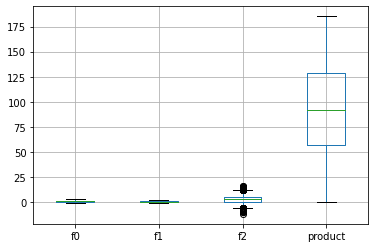

In [ ]:
df1[["f0","f1","f2", "product"]].boxplot()

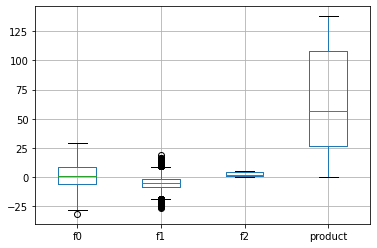

In [ ]:
df2[["f0","f1","f2", "product"]].boxplot()

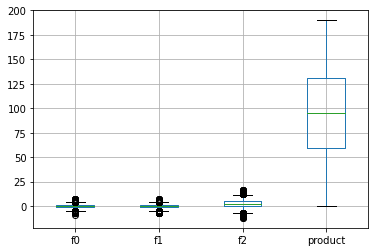

In [ ]:
df3[["f0","f1","f2", "product"]].boxplot()

При предработке данных было выяснено:
1. Типы данных распределены верно
2. В таблицах есть выбросы, которые необходимо удалить

# Выборка для таблицы df1

In [ ]:
q3, q1 = np.percentile(df1['f2'], [75 ,25])
iqr = q3 - q1
print('Межквартильный размах: ', iqr)
print()
print('Первый квартиль: ', q1)
print()
print('Третий квартиль: ', q3)
print()

min = q1 - 1.5*iqr
max = q3 + 1.5*iqr

print('Минимум: ', min)
print()
print('Максимум: ', max)

Межквартильный размах:  4.427339742598839

Первый квартиль:  0.28774815581444596

Третий квартиль:  4.715087898413286

Минимум:  -6.3532614580838125

Максимум:  11.356097512311544


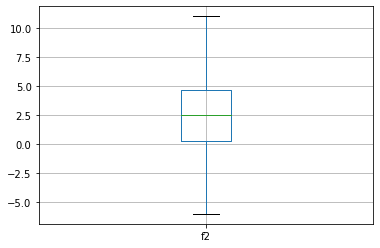

In [ ]:
df1 = df1.query('f2<11 and f2>-6').reset_index(drop=True)
df1[['f2']].boxplot()

# Выборка для таблицы f2

In [ ]:
df2[["f0"]].describe()

,f0
count,100000.000000
mean,1.141296
std,8.965932
min,-31.609576
25%,-6.298551
50%,1.153055
75%,8.621015
max,29.421755


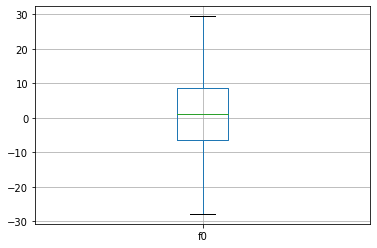

In [ ]:
df2 = df2.query('f0>-31').reset_index(drop=True)
df2[["f0"]].boxplot()

In [ ]:
q3, q1 = np.percentile(df2['f1'], [75 ,25])
iqr = q3 - q1
print('Межквартильный размах: ', iqr)
print()
print('Первый квартиль: ', q1)
print()
print('Третий квартиль: ', q3)
print()
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
print('Минимум: ', min)
print()
print('Максимум: ', max)

Межквартильный размах:  6.935198155797405

Первый квартиль:  -8.26804333005673

Третий квартиль:  -1.3328451742593255

Минимум:  -18.67084056375284

Максимум:  9.069952059436782


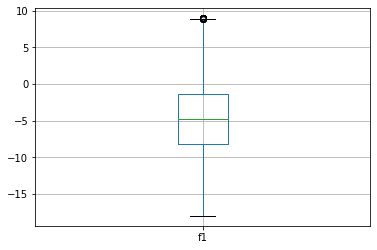

In [ ]:
df2 = df2.query('f1>-18 and f1<9').reset_index(drop=True)
df2[["f1"]].boxplot()

# Выборка для f3

In [ ]:
q3, q1 = np.percentile(df3['f0'], [75 ,25])
iqr = q3 - q1
print('Межквартильный размах: ', iqr)
print()
print('Первый квартиль: ', q1)
print()
print('Третий квартиль: ', q3)
print()
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
print('Минимум: ', min)
print()
print('Максимум: ', max)

Межквартильный размах:  2.3208238289103345

Первый квартиль:  -1.1622884801574571

Третий квартиль:  1.1585353487528773

Минимум:  -4.643524223522959

Максимум:  4.639771092118378


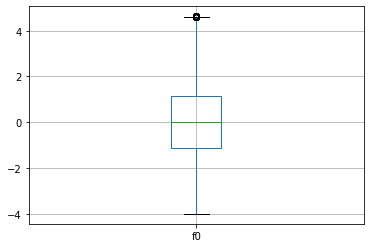

In [ ]:
df3 = df3.query('f0>-4 and f0<4.63').reset_index(drop=True)
df3[['f0']].boxplot()

In [ ]:
q3, q1 = np.percentile(df3['f1'], [75 ,25])
iqr = q3 - q1
print('Межквартильный размах: ', iqr)
print()
print('Первый квартиль: ', q1)
print()
print('Третий квартиль: ', q3)
print()
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
print('Минимум: ', min)
print()
print('Максимум: ', max)

Межквартильный размах:  2.3375306127069013

Первый квартиль:  -1.1743591904176731

Третий квартиль:  1.1631714222892282

Минимум:  -4.680655109478025

Максимум:  4.669467341349581


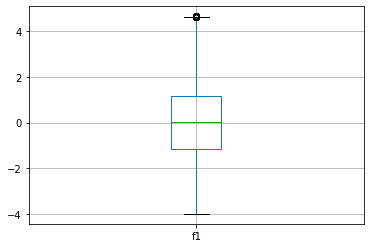

In [ ]:
df3 = df3.query('f1>-4 and f1<4.66').reset_index(drop=True)
df3[['f1']].boxplot()

In [ ]:
q3, q1 = np.percentile(df3['f2'], [75 ,25])
iqr = q3 - q1
print('Межквартильный размах: ', iqr)
print()
print('Первый квартиль: ', q1)
print()
print('Третий квартиль: ', q3)
print()
min = q1 - 1.5*iqr
max = q3 + 1.5*iqr
print('Минимум: ', min)
print()
print('Максимум: ', max)

Межквартильный размах:  4.727835228211241

Первый квартиль:  0.12735190042160022

Третий квартиль:  4.855187128632841

Минимум:  -6.964400941895261

Максимум:  11.946939970949703


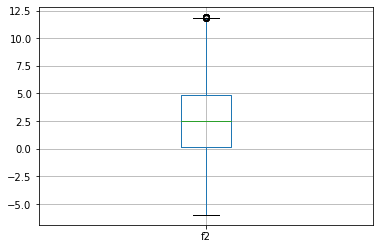

In [ ]:
df3 = df3.query('f2>-6 and f2<11.9').reset_index(drop=True)
df3[['f2']].boxplot()

# Вывод по разделу 1
* была просмотрена основная информация о таблицах,
* просмотрены типы данных - они корректны,
* были уничтожены выбросы
* пропуски не были обнаружены
* удалила столб, который не имел веса для модели

Возьмем и выделим для второго пункта
Признаки для модели:
* f0;
* f1;
* f2

Целевой признак:
* product.

### Обучение и проверка модели

Разделим датафреймы на обучающую df_train и валидационную df_valid выбороки в пропорциях 3:1

In [ ]:
train_0, valid_0 = train_test_split(df1, test_size=0.25, random_state=12345)
train_1, valid_1 = train_test_split(df2, test_size=0.25, random_state=12345)
train_2, valid_2 = train_test_split(df3, test_size=0.25, random_state=12345)

In [ ]:
print(train_0.shape, valid_0.shape)
print(train_1.shape, valid_1.shape)
print(train_2.shape, valid_2.shape)

(74436, 4) (24813, 4)
(74394, 4) (24799, 4)
(72204, 4) (24068, 4)


In [ ]:
def features_target_split(data):
    features = data.drop(['product'], axis=1)
    target = data['product']
    return features, target

train_features_0, train_target_0 = features_target_split(train_0)
train_features_1, train_target_1 = features_target_split(train_1)
train_features_2, train_target_2 = features_target_split(train_2)

valid_features_0, valid_target_0 = features_target_split(valid_0)
valid_features_1, valid_target_1 = features_target_split(valid_1)
valid_features_2, valid_target_2 = features_target_split(valid_2)

Масштабируем данные

In [ ]:
def data_to_StandardScaler(data):
    scaler = StandardScaler()
    scaler.fit(data)
    data = scaler.transform(data)
    return data

train_features_0 = data_to_StandardScaler(train_features_0)
train_features_1 = data_to_StandardScaler(train_features_1)
train_features_2 = data_to_StandardScaler(train_features_2)

valid_features_0 = data_to_StandardScaler(valid_features_0)
valid_features_1 = data_to_StandardScaler(valid_features_1)
valid_features_2 = data_to_StandardScaler(valid_features_2)

In [ ]:
model = LinearRegression()
def model_rmse(train_features, train_target, valid_features, valid_target):
    model.fit(train_features, train_target)
    predicted = model.predict(valid_features)
    mse_0 = mean_squared_error(valid_target, predicted)
    rmse_0 = mse_0 ** 0.5
    print('RMSE {}'.format(rmse_0))
    return predicted

Для таблицы 1

In [ ]:
print('запас {}'.format(df1['product'].mean()))
predicted_valid_0  = model_rmse(train_features_0, train_target_0, valid_features_0, valid_target_0)

запас 92.49048879811178
RMSE 37.67106964733876


Для таблицы 2

In [ ]:
print('запас {}'.format(df2['product'].mean()))
predicted_valid_1  = model_rmse(train_features_1, train_target_1, valid_features_1, valid_target_1)

запас 68.79362705482326
RMSE 1.0237588504941855


Для таблицы 3

In [ ]:
print('запас {}'.format(df3['product'].mean()))
predicted_valid_2  = model_rmse(train_features_2, train_target_2, valid_features_2, valid_target_2)

запас 94.73878325071396
RMSE 40.24713061538547


# Вывод раздел 2
* Данные предсказались лучше всего на второй табличке, где RMSE = 1.02,  модель  переобучилась
* Запас таблицы 1 - 92.49 наилучший
* Запас таблицы 2 - 68.793
* Запас таблицы 3 - 40.24

## Подготовка к расчёту прибыли

Уберем индексы таргетированного валидного признака со всех таблиц

In [ ]:
valid_target_0.reset_index(drop=True, inplace=True)
valid_target_1.reset_index(drop=True, inplace=True)
valid_target_2.reset_index(drop=True, inplace=True)

Приведем данные к сериес

In [ ]:
predicted_valid_0 = pd.Series(predicted_valid_0)
predicted_valid_1 = pd.Series(predicted_valid_1)
predicted_valid_2 = pd.Series(predicted_valid_2)

в тысячах

In [ ]:
budget = 10*(10**9)
chosen_points = 500
best_points = 200
price = 450000
damage_threshold =  0.025

In [ ]:
average_profit_per_point = budget / best_points
print('Средняя прибыль: ', average_profit_per_point)

Средняя прибыль:  50000000.0


In [ ]:
average_barrels_per_point = average_profit_per_point  / price
print('Средний объем нефти:',average_barrels_per_point)

Средний объем нефти: 111.11111111111111


In [ ]:
average_barrels = budget / price
print('Средний объем нефти на регион:',average_barrels)

Средний объем нефти на регион: 22222.222222222223


для 1 и 3 таблицы отличные показатели. Разброс значений вокруг среднего 92.5 и 94 говорит нам о том, что существует достаточно много скважин, где запасы больше необходимого среднего.

безубыточность составила 111.(1)

функция для расчёта прибыли по набору отобранных месторождений и предсказаний модели dis_revenue, принимающая на вход предсказания, истинные значения целевого признака и количество скважин и считающая общую прибыль



In [ ]:
def revenue(target, probabilities, count):
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return price*selected.sum() - budget

## Расчёт прибыли и рисков

In [ ]:
state = np.random.RandomState(12345)
def dis_revenue(target, probabilities):
    values = []
    lost = 0
    for i in range(1000):
        target_subsample = target.sample(n=500, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index]
        profit = revenue(target_subsample, probs_subsample, 200)
        if profit < 0:
            lost +=1
        values.append(profit)


    values = pd.Series(values)
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    average = values.mean()
    risk = lost / 1000
    return average, lower, upper, risk

In [ ]:
average_0, lower_0, upper_0, risk_0 = dis_revenue(valid_target_0, predicted_valid_0)
print('Средняя прибыль = {:.2f} тыс.руб.'.format(average_0))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_0, upper_0))
print('Процент риска {:.2%}'.format(risk_0))

Средняя прибыль = 450815137.53 тыс.руб.
95% доверительный интервал от -96554634.60 до 998708530.86 тыс.руб.
Процент риска 5.30%


In [ ]:
average_1, lower_1, upper_1, risk_1 = dis_revenue(valid_target_1, predicted_valid_1)
print('Средняя прибыль = {:.2f} тыс.руб.'.format(average_1))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_1, upper_1))
print('Процент риска {:.2%}'.format(risk_1))

Средняя прибыль = 504960982.77 тыс.руб.
95% доверительный интервал от 121697988.67 до 939342785.35 тыс.руб.
Процент риска 0.70%


In [ ]:
average_2, lower_2, upper_2, risk_2 = dis_revenue(valid_target_2, predicted_valid_2)
print('Средняя прибыль = {:.2f} тыс.руб.'.format(average_2))
print('95% доверительный интервал от {:.2f} до {:.2f} тыс.руб.'.format(lower_2, upper_2))
print('Процент риска {:.2%}'.format(risk_2))

Средняя прибыль = 266616158.05 тыс.руб.
95% доверительный интервал от -281942971.25 до 804606605.65 тыс.руб.
Процент риска 19.20%


# Вывод
* была проведена предработка данных
* удалены выборосы, ненужные столбцы
* данные разделены на выборки, далее можно сделать вывод о том, что
* второе место для бурение лучше всего подходит под критерии, так как риски составляют меньше 2,5 %